In [1]:
import re
import xml.etree.ElementTree as ET
from tabulate import tabulate
from matplotlib import pyplot as plt

In [2]:
with open('lh.atf') as f:
    lines = f.read().split('\n')
prologue_start = 0
prologue_end = lines.index('@law 1')
epilogue_start = lines.index('@epilogue')
epilogue_end = -1
prologue = lines[prologue_start:prologue_end]
epilogue = lines[epilogue_start:epilogue_end]

In [3]:
normed_words = ' '.join([line.split(":")[1].strip() for line in prologue+epilogue if line.startswith('#tr.ts')])
print(normed_words[:52])
print(len(normed_words.split()), 'words')

īnu anum ṣīrum šar anunnakī enlil bēl šamê u erṣetim
1397 words


In [4]:
translit_words = ' '.join([re.split("\d'?\.", line)[1].lstrip() for line in prologue+epilogue if re.search("\d+'?\.", line)])
print(translit_words[-10:])
print(len(translit_words.split()), 'words')

szu-da-szu
1394 words


In [5]:
places = [(word, i+95) for i, word in enumerate(translit_words.split()[95:450]) if word.endswith("{ki}")]
place_convert = {
    "nibru{ki}": "Nippur (Nuffar)",
    "{iri}eridu{ki}": "Eridu (Tell Abu Shahrain)",
    "babila{ki}": "Babylon",
    "{iri}uri5{ki}": "Ur (Tell Muqayyar)",
    "zimbir{ki}": "Sippar-dūrim (Tell ed-Der)",
    "larsa{ki}": "Larsa (Tulul Sinkara)",
    "unu{ki}": "Uruk (Warka)",
    "i3-si-in{ki}": "Isin (Ishan Bahriyat)",
    "{iri}kisz{ki}": "Kish",  # polygon
    "{iri}gu2-du8-a{ki}": "Kutû / Gudua / Kutha (Tell Ibrahim)",
    "{iri}bar-si2-pa2{ki}": "Borsippa (Birs Nimrud)",
    "dil-bat{ki}": "Dilbat (Deilam)",
    "kesz3{ki}": "Kesh",  # polygon
    "lagasz{ki}": "Lagaš (El-Hiba)",
    "gir2-su{ki}": "Girsu (Tello)",
    "zabala2{ki}": "Zabalam (Tulul Ibzaikh)",
    "{iri}im{ki}": "Karkara? (Tell Jidr U004)",
    "adab{ki}": "Adab (Bismaya)",
    "{iri}masz-gan-szabra{ki}": "Maškan-šapir (Tell Abu Duwari H639)",
    "ma3-al-nag-a{ki}": "Malgium (Tell Yassir)",
    "me-ra{ki}": "Mari (Tell Hariri)",
    "tu-tu-ul{ki}": "Tuttul (Tell Bi'a)",
    "esz3-nun-na{ki}": "Ešnunna (Tell Asmar D244)",
    "a-ga-de3{ki}": "Akkad",
    "{iri}a-szur4{ki}": "Aššur (Qal'at Sherqat)",
    "ni-nu-a{ki}": "Nineveh (Tell Kuyunjik)",
}
places

[('nibru{ki}', 96),
 ('{iri}eridu{ki}', 105),
 ('babila{ki}', 116),
 ('{iri}uri5{ki}', 132),
 ('zimbir{ki}', 146),
 ('larsa{ki}', 159),
 ('unu{ki}', 167),
 ('i3-si-in{ki}', 188),
 ('{iri}kisz{ki}', 199),
 ('{iri}gu2-du8-a{ki}', 219),
 ('{iri}bar-si2-pa2{ki}', 232),
 ('dil-bat{ki}', 245),
 ('kesz3{ki}', 263),
 ('lagasz{ki}', 276),
 ('gir2-su{ki}', 278),
 ('zabala2{ki}', 291),
 ('{iri}im{ki}', 307),
 ('adab{ki}', 316),
 ('{iri}masz-gan-szabra{ki}', 329),
 ('ma3-al-nag-a{ki}', 342),
 ('me-ra{ki}', 370),
 ('tu-tu-ul{ki}', 372),
 ('esz3-nun-na{ki}', 384),
 ('babila{ki}', 392),
 ('a-ga-de3{ki}', 406),
 ('{iri}a-szur4{ki}', 416),
 ('ni-nu-a{ki}', 422),
 ('babila{ki}', 447)]

In [6]:
locations = {}
tree = ET.parse("ane.kml")
nmsp = "{http://www.opengis.net/kml/2.2}"
for pm in tree.iterfind(f".//{nmsp}Placemark"):
    name = pm.find(f"{nmsp}name").text
    if name in place_convert.values() and name not in locations.keys():
        if pm.find(f"{nmsp}Polygon"):
            coordinates = pm.find(
                f"{nmsp}Polygon/{nmsp}outerBoundaryIs/{nmsp}LinearRing/{nmsp}coordinates"
            ).text.split(",0")[:-1]
            coordinates = [
                [ll.strip() for ll in cord.split(",")] for cord in coordinates
            ]
            long = sum(float(l[0]) for l in coordinates) / len(coordinates)
            lat = sum(float(l[1]) for l in coordinates) / len(coordinates)
        else:
            long = pm.find(f"{nmsp}LookAt/{nmsp}longitude").text
            lat = pm.find(f"{nmsp}LookAt/{nmsp}latitude").text
        locations[name] = (lat, long)
locations

{'Adab (Bismaya)': ('31.95046659938187', '45.62344759451286'),
 "Aššur (Qal'at Sherqat)": ('35.45626203771533', '43.25979491334806'),
 'Babylon': ('32.54036017476352', '44.42632915275695'),
 'Borsippa (Birs Nimrud)': ('32.39244525686937', '44.34249593975841'),
 'Dilbat (Deilam)': ('32.29571615001174', '44.46622078649037'),
 'Eridu (Tell Abu Shahrain)': ('30.81686971277664', '45.99672447851623'),
 'Ešnunna (Tell Asmar D244)': ('33.48313061963756', '44.72850137066683'),
 'Girsu (Tello)': ('31.55980384457702', '46.17866802939608'),
 'Isin (Ishan Bahriyat)': ('31.88640216500606', '45.27050931069247'),
 'Karkara? (Tell Jidr U004)': ('31.82392203365745', '45.70750109912942'),
 'Kutû / Gudua / Kutha (Tell Ibrahim)': ('32.75989763098715',
  '44.61289455976172'),
 'Lagaš (El-Hiba)': ('31.4183207967609', '46.41221284166029'),
 'Larsa (Tulul Sinkara)': ('31.2847270536885', '45.85513267913957'),
 'Mari (Tell Hariri)': ('34.55048884495861', '40.8900285084387'),
 'Maškan-šapir (Tell Abu Duwari H639)

In [7]:
places_groups = {
    "theological_heptad": [
        "Nippur (Nuffar)",
        "Eridu (Tell Abu Shahrain)",
        "Babylon",
        "Ur (Tell Muqayyar)",
        "Sippar-dūrim (Tell ed-Der)",
        "Larsa (Tulul Sinkara)",
        "Uruk (Warka)",
    ],
    "first_group": [
        "Isin (Ishan Bahriyat)",
        "Kish",
        "Kutû / Gudua / Kutha (Tell Ibrahim)",
        "Borsippa (Birs Nimrud)",
        "Dilbat (Deilam)",
        "Kesh",
    ],
    "second_group": [
        "Lagaš (El-Hiba)",
        "Girsu (Tello)",
        "Zabalam (Tulul Ibzaikh)",
        "Karkara? (Tell Jidr U004)",
        "Adab (Bismaya)",
        "Maškan-šapir (Tell Abu Duwari H639)",
        "Malgium (Tell Yassir)",
    ],
    "third_group": [
        "Mari (Tell Hariri)",
        "Tuttul (Tell Bi'a)",
        "Ešnunna (Tell Asmar D244)",
        "Akkad",
        "Aššur (Qal'at Sherqat)",
        "Nineveh (Tell Kuyunjik)",
    ],
}

In [8]:
itinerary = [locations[place_convert[name]] for name, i in places if place_convert[name] not in ['Akkad', 'Kesh']]

In [9]:
from ipyleaflet import AntPath, AwesomeIcon, Map, Marker
from ipywidgets import HTML

m = Map(center=(33, 45), zoom=5)
m.layout.height = "800px"

line = AntPath(
    locations=itinerary, fill=False, weight=2, color="#7590ba", pulse_color="#3f6fba"
)

m.add_layer(line)

theological_heptad_icon = AwesomeIcon(name="home", marker_color="red")
first_group_icon = AwesomeIcon(name="home", marker_color="orange")
second_group_icon = AwesomeIcon(name="home", marker_color="darkblue")
third_group_icon = AwesomeIcon(name="home", marker_color="green")

for city, loc in locations.items():
    if city in places_groups["theological_heptad"]:
        marker = Marker(
            location=loc, title=city, icon=theological_heptad_icon, draggable=False
        )
    elif city in places_groups["first_group"]:
        marker = Marker(
            location=loc, title=city, icon=first_group_icon, draggable=False
        )
    elif city in places_groups["second_group"]:
        marker = Marker(
            location=loc, title=city, icon=second_group_icon, draggable=False
        )
    elif city in places_groups["third_group"]:
        marker = Marker(
            location=loc, title=city, icon=third_group_icon, draggable=False
        )
    m.add_layer(marker)

m

Map(center=[33, 45], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_tex…

## Explaining the map
Consolidation of core state, raiding to the nort

In [11]:
graph = []
prev = places[0]
for place in places[1:]:
    graph.append([(place_convert[prev[0]], place_convert[place[0]]), place[1]-prev[1]])
    prev = place
#graph

# Graph with Ešnunna
graph = [[('Nippur (Nuffar)', 'Eridu (Tell Abu Shahrain)'), 9],
 [('Eridu (Tell Abu Shahrain)', 'Babylon'), 11],
 [('Babylon', 'Ur (Tell Muqayyar)'), 16],
 [('Ur (Tell Muqayyar)', 'Sippar-dūrim (Tell ed-Der)'), 14],
 [('Sippar-dūrim (Tell ed-Der)', 'Larsa (Tulul Sinkara)'), 13],
 [('Larsa (Tulul Sinkara)', 'Uruk (Warka)'), 8],
 [('Uruk (Warka)', 'Isin (Ishan Bahriyat)'), 21],
 [('Isin (Ishan Bahriyat)', 'Kish'), 11],
 [('Kish', 'Kutû / Gudua / Kutha (Tell Ibrahim)'), 20],
 [('Kutû / Gudua / Kutha (Tell Ibrahim)', 'Borsippa (Birs Nimrud)'), 13],
 [('Borsippa (Birs Nimrud)', 'Dilbat (Deilam)'), 13],
 [('Dilbat (Deilam)', 'Kesh'), 18],
 [('Kesh', 'Lagaš (El-Hiba)'), 13],
 [('Lagaš (El-Hiba)', 'Girsu (Tello)'), 2],
 [('Girsu (Tello)', 'Zabalam (Tulul Ibzaikh)'), 13],
 [('Zabalam (Tulul Ibzaikh)', 'Karkara? (Tell Jidr U004)'), 16],
 [('Karkara? (Tell Jidr U004)', 'Adab (Bismaya)'), 9],
 [('Adab (Bismaya)', 'Maškan-šapir (Tell Abu Duwari H639)'), 13],
 [('Maškan-šapir (Tell Abu Duwari H639)', 'Malgium (Tell Yassir)'), 13],
 [('Malgium (Tell Yassir)', 'Mari (Tell Hariri)'), 28],
 [('Mari (Tell Hariri)', "Tuttul (Tell Bi'a)"), 2],
 [("Tuttul (Tell Bi'a)", 'Ešnunna (Tell Asmar D244)'), 18],
 [('Ešnunna (Tell Asmar D244)', 'Akkad'), 14],
 [('Akkad', "Aššur (Qal'at Sherqat)"), 10],
 [("Aššur (Qal'at Sherqat)", 'Nineveh (Tell Kuyunjik)'), 6],
 [('Nineveh (Tell Kuyunjik)', 'Babylon'), 25]]

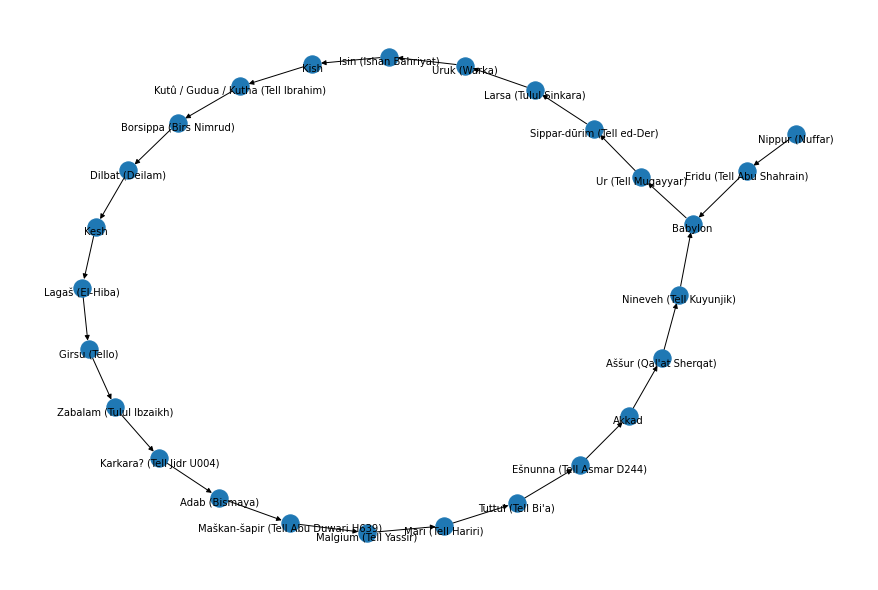

In [254]:
import networkx as nx
import numpy as np

G = nx.DiGraph()
G.add_edges_from([edge[0] for edge in graph])

pos = nx.kamada_kawai_layout(G)

plt.figure(1, figsize=(12, 8))
nx.draw(G, pos, verticalalignment='top', with_labels=True, font_size=10)

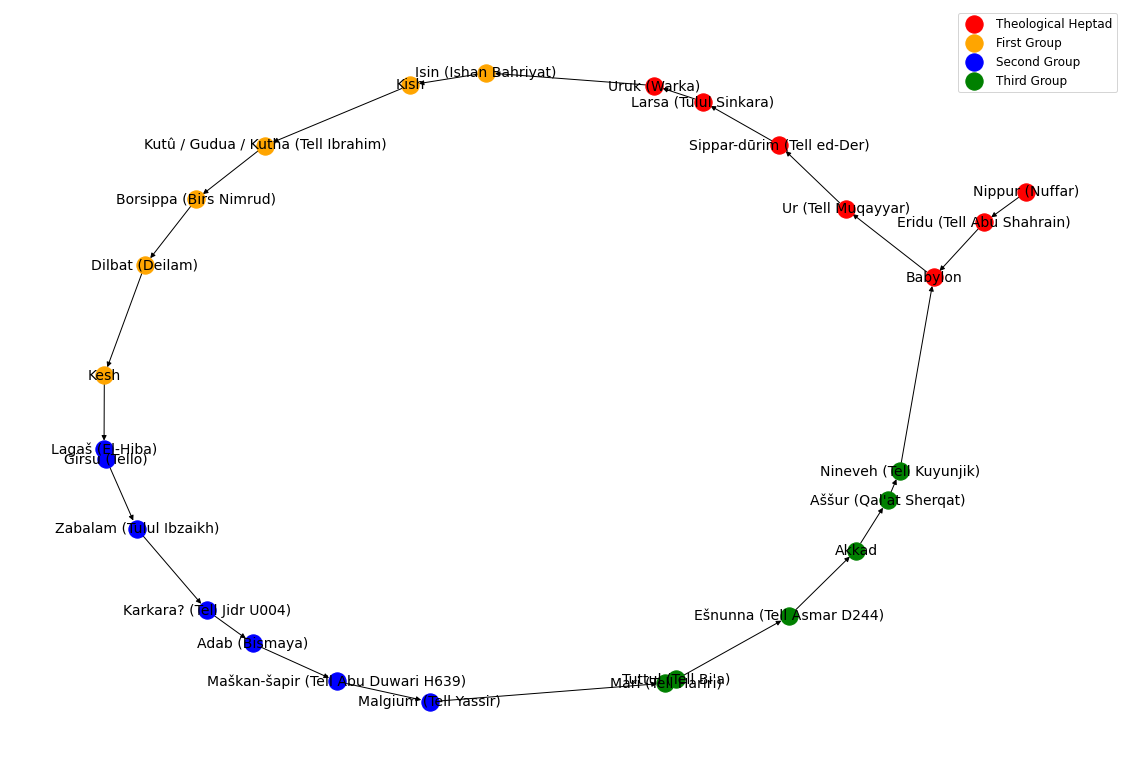

In [18]:
import matplotlib as mpl
import networkx as nx
import numpy as np



G = nx.DiGraph()
for edge in graph:
    G.add_edge(edge[0][0], edge[0][1], weight=edge[1])

pos = nx.kamada_kawai_layout(G)

plt.rcParams.update({'font.size': 22})                
plt.figure(1, figsize=(20, 14))


nx.draw_networkx_nodes(
    G,
    pos=pos,
    nodelist=[node for node in G if node in places_groups["theological_heptad"]],
    node_color="red",
    label="Theological Heptad",
)
nx.draw_networkx_nodes(
    G,
    pos=pos,
    nodelist=[node for node in G if node in places_groups["first_group"]],
    node_color="orange",
    label="First Group",
)
nx.draw_networkx_nodes(
    G,
    pos=pos,
    nodelist=[node for node in G if node in places_groups["second_group"]],
    node_color="blue",
    label="Second Group",
)
nx.draw_networkx_nodes(
    G,
    pos=pos,
    nodelist=[node for node in G if node in places_groups["third_group"]],
    node_color="green",
    label="Third Group",
)

nx.draw_networkx_edges(G, pos=pos)
nx.draw_networkx_labels(G, pos, font_size=14)


ax = plt.gca()
ax.set_axis_off()
plt.legend(scatterpoints=1, prop={'size': 12})
plt.show()